In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Serve para setar o tema do Matplotlib para ser o mesmo do Seaborn

In [22]:
df = pd.read_csv('Previsão de Limite de Crédito.csv')

df.head()

,Limit,Score
0,3606,283
1,6645,483
2,7075,514
3,9504,681
4,4897,357


### Visualização gráfica

<AxesSubplot:xlabel='Score', ylabel='Limit'>

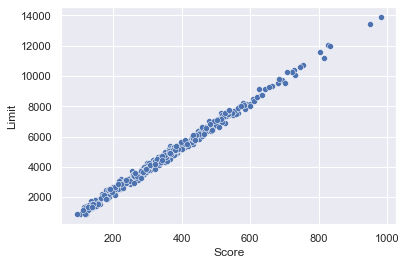

In [23]:
sns.scatterplot(data=df, x='Score', y='Limit')

### Calculando a correlação entre as features

In [24]:
from scipy.stats import pearsonr
pearsonr(df['Score'], df['Limit'])

(0.9968797370016829, 0.0)

- Correlação muito forte: [-1, -0.8] or [0.8, 1]

$$
\beta_1 = \sum_{i=1}^N \frac{(x_i - \bar{x}) \cdot (y_i - \bar{y})}{(x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [25]:
x_mean = df['Score'].mean()
x_mean

354.94

In [26]:
y_mean = df['Limit'].mean()
y_mean

4735.6

In [27]:
x = df['Score']
y = df['Limit']

In [28]:
numerador = sum((x - x_mean) * (y - y_mean))
numerador

142051874.39999992

In [29]:
denominador = sum((x - x_mean)**2)
denominador

9551884.560000006

In [30]:
beta1 = numerador / denominador
beta1

14.871607116658854

In [31]:
beta0 = y_mean - (beta1 * x_mean)
beta0 # intercepto

-542.9282299868937

In [32]:
y_est = beta1 * x + beta0
y_est

0      3665.736584
1      6640.058007
2      7101.077828
3      9584.636216
4      4766.235511
          ...     
395    4022.655155
396    3859.067477
397    4230.857654
398    2312.420336
399    5628.788723
Name: Score, Length: 400, dtype: float64

In [33]:
y

0      3606
1      6645
2      7075
3      9504
4      4897
       ... 
395    4100
396    3838
397    4171
398    2525
399    5524
Name: Limit, Length: 400, dtype: int64

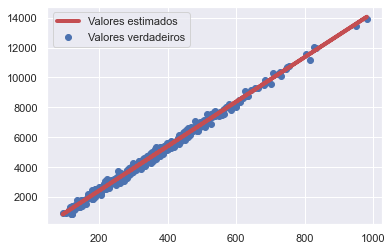

In [34]:
plt.scatter(df['Score'], df['Limit'], label='Valores verdadeiros')                    # Valores verdadeiros
plt.plot(df['Score'], y_est, linewidth=4, color='r', label='Valores estimados')      # Valores estimados
plt.legend()


### Scikit Learn

In [36]:
x = df['Score']
y = df['Limit']

In [37]:
pip install -U sklearn


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=06c2fb7dfc2b81dfb1f785857c743da3c40cdadc04a3117b9437e08d09427805
  Stored in directory: c:\users\rafae\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr

LinearRegression()

In [40]:
lr.fit(X, y) # Treinou o modelo (calcular os coeficientes)

LinearRegression()

In [43]:
lr.coef_ # Um array com os coeficientes que multiplicam o X => No nosso caso, esse é o beta1

array([14.87160712])

In [42]:
beta1

14.871607116658854

In [44]:
lr.intercept_ # Intercepto (ou seja, o beta0)

-542.9282299869001

In [45]:
y_est = lr.coef_[0] * x + lr.intercept_
y_est

0      3665.736584
1      6640.058007
2      7101.077828
3      9584.636216
4      4766.235511
          ...     
395    4022.655155
396    3859.067477
397    4230.857654
398    2312.420336
399    5628.788723
Name: Score, Length: 400, dtype: float64

In [46]:
X.values

array([[283],
       [483],
       [514],
       [681],
       [357],
       [569],
       [259],
       [512],
       [266],
       [491],
       [589],
       [138],
       [394],
       [511],
       [269],
       [200],
       [286],
       [339],
       [448],
       [479],
       [235],
       [458],
       [213],
       [398],
       [156],
       [326],
       [289],
       [333],
       [949],
       [411],
       [413],
       [210],
       [563],
       [162],
       [199],
       [220],
       [455],
       [462],
       [300],
       [264],
       [253],
       [538],
       [351],
       [445],
       [469],
       [564],
       [376],
       [320],
       [205],
       [354],
       [376],
       [301],
       [394],
       [413],
       [138],
       [154],
       [372],
       [367],
       [281],
       [390],
       [364],
       [254],
       [160],
       [251],
       [223],
       [320],
       [694],
       [380],
       [418],
       [505],
       [318],
      

In [47]:
lr.predict([[150], [180], [200]])

array([1687.81283751, 2133.96105101, 2431.39319334])

In [48]:
y_pred = lr.predict(X)
y_pred

array([ 3665.73658403,  6640.05800736,  7101.07782798,  9584.63621646,
        4766.23551066,  7919.01621939,  3308.81801323,  7071.33461374,
        3412.91926304,  6759.03086429,  8216.44836173,  1509.35355211,
        5316.48497398,  7056.46300663,  3457.53408439,  2431.39319334,
        3710.35140538,  4498.54658256,  6119.55175828,  6580.57157889,
        2951.89944243,  6268.26782944,  2624.72408586,  5375.97140244,
        1777.04248021,  4305.21569004,  3754.96622673,  4409.31693986,
       13570.22692372,  5569.30229496,  5599.04550919,  2580.10926451,
        7829.78657669,  1866.27212291,  2416.52158623,  2728.82533568,
        6223.65300809,  6327.75425791,  3918.55390501,  3383.17604881,
        3219.58837053,  7457.99639878,  4677.00586796,  6074.93693693,
        6431.85550773,  7844.65818381,  5048.79604588,  4215.98604734,
        2505.75122893,  4721.62068931,  5048.79604588,  3933.42551213,
        5316.48497398,  5599.04550919,  1509.35355211,  1747.29926598,
      

### Statsmodels

In [49]:
import statsmodels.api as sm

In [50]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:51:04   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Score         14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Influência dos Outliers

### Obtendo apenas 100 amostras (como array)

In [59]:
X = df['Score'].values[:400]
y = df['Limit'].values[:400]


In [56]:
X.shape

(100,)

In [55]:
y.shape

(100,)

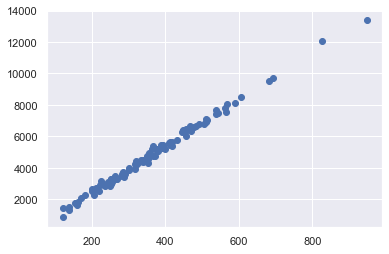

In [57]:
plt.scatter(X, y)

### Modelo sem a presença dos outliers

In [61]:
lr = LinearRegression().fit(X.reshape(-1, 1), y)

In [62]:
lr.coef_

array([14.87160712])

In [63]:
lr.intercept_

-542.9282299869001

In [64]:
y_est = lr.predict(X.reshape(-1, 1))

In [65]:
residuos = y - y_est # Valor verdadeiro - Valor estimado

In [66]:
residuos

array([ -59.73658403,    4.94199264,  -26.07782798,  -80.63621646,
        130.76448934,  127.98378061,   79.18198677,   42.66538626,
       -112.91926304,   59.96913571,  -99.44836173, -198.35355211,
         -8.48497398, -134.46300663, -166.53408439,   93.60680666,
          3.64859462, -120.54658256,  264.44824172,   45.42842111,
        -91.89944243,  109.73217056,    6.27591414, -196.97140244,
        -20.04248021,   17.78430996, -129.96622673,  124.68306014,
       -156.22692372,   41.69770504,   66.95449081,  152.89073549,
          8.21342331,  -37.27212291,  229.47841377, -170.82533568,
        233.34699191,  153.24574209,  -19.55390501,   77.82395119,
        107.41162947,  201.00360122,   85.99413204,  182.06306307,
        -56.85550773, -275.65818381,   -5.79604588,  215.01395266,
       -253.75122893, -152.62068931,  134.20395412,   35.57448787,
        124.51502602, -133.04550919,  -10.35355211,   38.70073402,
       -247.30961741, -135.95158183, -155.99336979,   37.00145

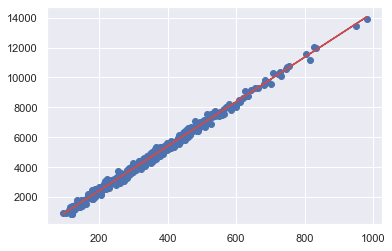

In [69]:
plt.scatter(X, y)
plt.plot(X, y_est, color='r')

## Características dos Resíduos

#### 1. Não devem ser correlacionados

#### Sem outliers

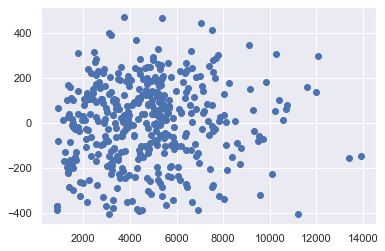

In [71]:
plt.scatter(y, y - y_est)

### 2. Ter média zero
#### Sem outliers

In [73]:
residuos = y - y_est

residuos.mean()

-5.405809133662842e-13

### 4. Distribuição normal dos resíduos

<AxesSubplot:ylabel='Count'>

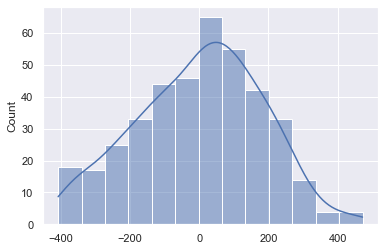

In [74]:
sns.histplot(residuos, kde=True)

In [76]:
from scipy.stats import normaltest
normaltest(residuos)

NormaltestResult(statistic=6.887440109916825, pvalue=0.03194562452987782)

## Métricas para Análise dos Erros

$$
SQE = \sum_{i=1}^N \epsilon_i^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - \hat{y}_i\right]^2 = \frac{1}{N} \sum_{i=1}^N \left[y_i - (\beta_0 + \beta_1x_i)\right]^2
$$

$$
SQT = \sum_{i=1}^N \left(\hat{y}_i - \overline{y}\right)^2
$$

$$
SQExp = \sum_{i=1}^N \left(y_i - \overline{y}\right)^2
$$

### 1. R-Quadrado ($R^2$)

$$
R^2 = 1 - \frac{SQE}{SQT} = \frac{SQT - SQExp}{SQT} = \frac{SQExp}{SQT}
$$

In [80]:
# Valores estimados, utilizando o modelo treinado com os outliers, para os dados com outliers
y_est = lr.predict(X.reshape(-1, 1))

In [81]:
from sklearn.metrics import r2_score

In [82]:
y.shape

(400,)

In [83]:
y_est.shape

(400,)

In [84]:
r2_score(y, y_est)

0.9937692100445441

In [91]:
r2_score(y, lr.predict(X.reshape(-1, 1)))

0.9937692100445441

In [92]:
lr.score(X.reshape(-1, 1), y) # r2_score

0.9937692100445441

### 2. MAE

In [98]:
from sklearn.metrics import mean_absolute_error

In [99]:
mean_absolute_error(y, y_est)

148.1136168180826

### 3. MSE

In [101]:
from sklearn.metrics import mean_squared_error as MSE

In [102]:
MSE(y, y_est)

33113.29934556935

### 4. RMSE

In [103]:
np.sqrt(MSE(y, y_est))

181.97060022313866

### 5. RMSLE

In [104]:
from sklearn.metrics import mean_squared_log_error

In [105]:
mean_squared_log_error(y, y_est)

0.00374033208373605